# Deepshikha Prajapati

## Stock Market Prediction using Numerical and Textual Analysis
 
Using Stacked LSTM

## Dataset 
Historical stock prices: https://finance.yahoo.com/

Textual News Headlines: https://bit.ly/36fFPI6

### importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
 
import math
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation
 
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
 
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:
 # reading the datasets into pandas
stock_price = pd.read_csv('/content/drive/MyDrive/AAPL (1).csv')
stock_headlines = pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv')

 ### Displaying first 5 stock price Dataset

In [ ]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-11,114.570000,115.230003,110.000000,112.000000,111.284241,180860300
1,2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100
2,2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000
3,2020-09-16,115.230003,116.000000,112.040001,112.129997,111.413406,154679000
4,2020-09-17,109.720001,112.199997,108.709999,110.339996,109.634850,178011000


### Displaying last 5 stock price Dataset

In [ ]:
stock_price.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-09-03,153.759995,154.630005,153.089996,154.300003,154.300003,57808700
248,2021-09-07,154.970001,157.259995,154.389999,156.690002,156.690002,82278300
249,2021-09-08,156.979996,157.039993,153.979996,155.110001,155.110001,74420200
250,2021-09-09,155.490005,156.110001,153.949997,154.070007,154.070007,57305700
251,2021-09-10,155.000000,155.479996,148.699997,148.970001,148.970001,140646400


### Displaying stock news headlines Dataset

In [ ]:
 stock_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


### Displaying stock news headlines Dataset

In [ ]:
 stock_headlines.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


Displaying number of records in both stock_price and stock_headlines Datasets

In [ ]:
 len(stock_price), len(stock_headlines)

(252, 3424067)

checking for null values in both the Datasets

In [ ]:
 stock_price.isna().any(), stock_headlines.isna().any()

(Date         False
 Open         False
 High         False
 Low          False
 Close        False
 Adj Close    False
 Volume       False
 dtype: bool, publish_date         False
 headline_category    False
 headline_text        False
 dtype: bool)

### Stock Price Data

In [ ]:
 # dropping duplicates
stock_price = stock_price.drop_duplicates()
 
# coverting the datatype of column 'Date' from type object to type 'datetime'
stock_price['Date'] = pd.to_datetime(stock_price['Date']).dt.normalize()
 
# filtering the important columns required
stock_price = stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])
 
# setting column 'Date' as the index column
stock_price.set_index('Date', inplace= True)
 
# sorting the data according to the index i.e 'Date'
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

,Close,Open,High,Low,Volume
Date,,,,,
2020-09-11,112.000000,114.570000,115.230003,110.000000,180860300
2020-09-14,115.360001,114.720001,115.930000,112.800003,140150100
2020-09-15,115.540001,118.330002,118.830002,113.610001,184642000
2020-09-16,112.129997,115.230003,116.000000,112.040001,154679000
2020-09-17,110.339996,109.720001,112.199997,108.709999,178011000
...,...,...,...,...,...
2021-09-03,154.300003,153.759995,154.630005,153.089996,57808700
2021-09-07,156.690002,154.970001,157.259995,154.389999,82278300
2021-09-08,155.110001,156.979996,157.039993,153.979996,74420200


### Stock News Headlines Data

In [ ]:
 # dropping duplicates
stock_headlines = stock_headlines.drop_duplicates()
 
# coverting the datatype of column 'Date' from type string to type 'datetime'
stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date']).dt.normalize()
 
# filtering the important columns required
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])
 
# grouping the news headlines according to 'Date'
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()
 
# setting column 'Date' as the index column
stock_headlines.set_index('publish_date', inplace= True)
 
# sorting the data according to the index i.e 'Date'
stock_headlines = stock_headlines.sort_index(ascending=True, axis=0)
stock_headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


### Combined Stock Data and Stock Headlines Data

In [ ]:
# concatenating the datasets stock_price and stock_headlines
stock_data = pd.concat([stock_price, stock_headlines], axis=1)
 
# dropping the null values if any
stock_data.dropna(axis=0, inplace=True)
 
# displaying the combined stock_data
stock_data

,Close,Open,High,Low,Volume,headline_text
2020-09-11,112.000000,114.570000,115.230003,110.000000,180860300.0,Horoscope Today; 11 September 2020: Check astr...
2020-09-14,115.360001,114.720001,115.930000,112.800003,140150100.0,Lockdown horror? Domestic violence cases doubl...
2020-09-15,115.540001,118.330002,118.830002,113.610001,184642000.0,Urvashi Rautela: The Pagalpanti actress was a ...
2020-09-16,112.129997,115.230003,116.000000,112.040001,154679000.0,Horoscope Today; 16 September 2020: Check astr...
2020-09-17,110.339996,109.720001,112.199997,108.709999,178011000.0,Daily Covid cases drop to 519 in Kolhapur dist...
...,...,...,...,...,...,...
2020-12-24,131.970001,131.320007,133.460007,131.100006,54930100.0,How to set the mood for sex during cold winter...
2020-12-28,136.690002,133.990005,137.339996,133.509995,124486200.0,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,134.869995,138.050003,138.789993,134.339996,121047300.0,Man recovers charred remains of 'thief' from h...
2020-12-30,133.720001,135.580002,135.990005,133.399994,96452100.0,Numerology Readings 30 December 2020: Predicti...


 ### Calculating Sentiment Scores

In [ ]:
 
# adding empty sentiment columns to stock_data for later calculation
stock_data['compound'] = ''
stock_data['negative'] = ''
stock_data['neutral'] = ''
stock_data['positive'] = ''
stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2020-09-11,112.000000,114.570000,115.230003,110.000000,180860300.0,Horoscope Today; 11 September 2020: Check astr...,,,,
2020-09-14,115.360001,114.720001,115.930000,112.800003,140150100.0,Lockdown horror? Domestic violence cases doubl...,,,,
2020-09-15,115.540001,118.330002,118.830002,113.610001,184642000.0,Urvashi Rautela: The Pagalpanti actress was a ...,,,,
2020-09-16,112.129997,115.230003,116.000000,112.040001,154679000.0,Horoscope Today; 16 September 2020: Check astr...,,,,
2020-09-17,110.339996,109.720001,112.199997,108.709999,178011000.0,Daily Covid cases drop to 519 in Kolhapur dist...,,,,


In [ ]:
 # importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
 
# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()
 
# calculating sentiment scores
stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])
 
# displaying the stock data
stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2020-09-11,112.000000,114.570000,115.230003,110.000000,180860300.0,Horoscope Today; 11 September 2020: Check astr...,-0.9990,0.104,0.822,0.074
2020-09-14,115.360001,114.720001,115.930000,112.800003,140150100.0,Lockdown horror? Domestic violence cases doubl...,-0.9997,0.129,0.790,0.081
2020-09-15,115.540001,118.330002,118.830002,113.610001,184642000.0,Urvashi Rautela: The Pagalpanti actress was a ...,-0.9998,0.133,0.796,0.071
2020-09-16,112.129997,115.230003,116.000000,112.040001,154679000.0,Horoscope Today; 16 September 2020: Check astr...,-0.9998,0.131,0.793,0.076
2020-09-17,110.339996,109.720001,112.199997,108.709999,178011000.0,Daily Covid cases drop to 519 in Kolhapur dist...,-0.9998,0.122,0.815,0.063


### Finalising Stock Data and writing to Disk

In [ ]:
 # dropping the 'headline_text' which is unwanted now
stock_data.drop(['headline_text'], inplace=True, axis=1)
 
# rearranging the columns of the whole stock_data
stock_data = stock_data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]
 
# displaying the final stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2020-09-11,112.000000,-0.9990,0.104,0.822,0.074,114.570000,115.230003,110.000000,180860300.0
2020-09-14,115.360001,-0.9997,0.129,0.790,0.081,114.720001,115.930000,112.800003,140150100.0
2020-09-15,115.540001,-0.9998,0.133,0.796,0.071,118.330002,118.830002,113.610001,184642000.0
2020-09-16,112.129997,-0.9998,0.131,0.793,0.076,115.230003,116.000000,112.040001,154679000.0
2020-09-17,110.339996,-0.9998,0.122,0.815,0.063,109.720001,112.199997,108.709999,178011000.0


In [ ]:
 # writing the prepared stock_data to disk
stock_data.to_csv('stock_data.csv')

### Reading Stock Data

In [ ]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('stock_data.csv', index_col = False)
 
# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
 
# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)
 
# displaying the stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2020-09-11,112.000000,-0.9990,0.104,0.822,0.074,114.570000,115.230003,110.000000,180860300.0
2020-09-14,115.360001,-0.9997,0.129,0.790,0.081,114.720001,115.930000,112.800003,140150100.0
2020-09-15,115.540001,-0.9998,0.133,0.796,0.071,118.330002,118.830002,113.610001,184642000.0
2020-09-16,112.129997,-0.9998,0.131,0.793,0.076,115.230003,116.000000,112.040001,154679000.0
2020-09-17,110.339996,-0.9998,0.122,0.815,0.063,109.720001,112.199997,108.709999,178011000.0


In [ ]:
# displaying the shape i.e. number of rows and columns of stock_data
stock_data.shape

(78, 9)

In [ ]:
# checking for null values
stock_data.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
# displaying stock_data statistics
stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,7.800000e+01
mean,118.776667,-0.974004,0.126962,0.796051,0.077013,118.824488,120.387308,117.143461,1.242606e+08
std,6.732080,0.226163,0.017311,0.024630,0.011916,6.801064,6.585422,6.870492,4.488537e+07
min,106.839996,-0.999900,0.080000,0.743000,0.044000,104.540001,110.190002,103.099998,4.669130e+07
25%,114.987501,-0.999800,0.117250,0.781250,0.071250,114.645003,116.030001,112.820002,9.025525e+07
50%,117.154999,-0.999800,0.128500,0.792000,0.077000,117.614998,119.020000,116.174999,1.152415e+08
75%,122.370003,-0.999600,0.138000,0.811500,0.083000,122.237498,123.445001,120.450003,1.490184e+08
max,136.690002,0.997800,0.161000,0.857000,0.126000,138.050003,138.789993,134.339996,2.871049e+08


In [ ]:
# displaying stock_data information
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 2020-09-11 to 2020-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     78 non-null     float64
 1   compound  78 non-null     float64
 2   negative  78 non-null     float64
 3   neutral   78 non-null     float64
 4   positive  78 non-null     float64
 5   Open      78 non-null     float64
 6   High      78 non-null     float64
 7   Low       78 non-null     float64
 8   Volume    78 non-null     float64
dtypes: float64(9)
memory usage: 6.1+ KB


 ### EDA of Stock Data

Text(0, 0.5, 'Close Price ($)')

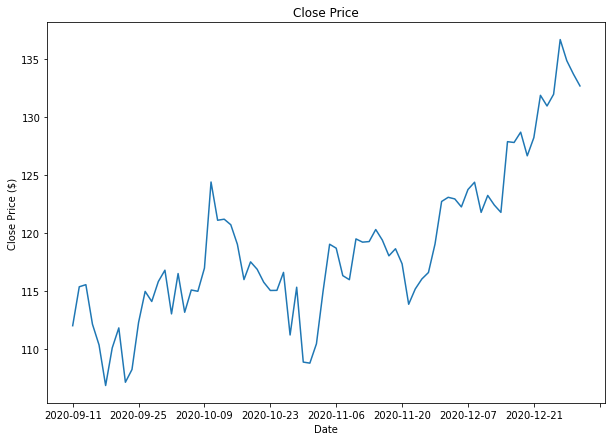

In [ ]:
# setting figure size
plt.figure(figsize=(10,7))
 
# plotting close price
stock_data['Close'].plot()
 
# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [ ]:
 # calculating 7 day rolling mean
stock_data.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2020-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-21,111.755713,-0.999629,0.119000,0.813143,0.068000,112.501430,114.180000,109.478571,1.887373e+08
2020-09-22,111.728570,-0.999743,0.123000,0.810143,0.067000,112.231430,113.841428,109.358572,1.890509e+08
2020-09-23,110.551428,-0.999771,0.126143,0.806714,0.067286,111.788573,113.295714,108.497142,1.905607e+08


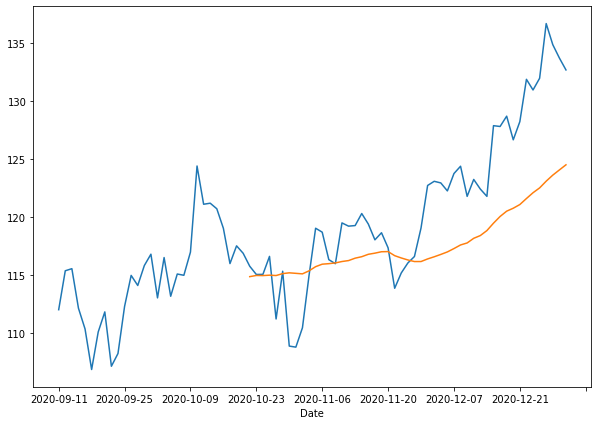

In [ ]:
 
# setting figure size
plt.figure(figsize=(10,7))
 
# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

In [ ]:
 # displaying stock_data
stock_data

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2020-09-11,112.000000,-0.9990,0.104,0.822,0.074,114.570000,115.230003,110.000000,180860300.0
2020-09-14,115.360001,-0.9997,0.129,0.790,0.081,114.720001,115.930000,112.800003,140150100.0
2020-09-15,115.540001,-0.9998,0.133,0.796,0.071,118.330002,118.830002,113.610001,184642000.0
2020-09-16,112.129997,-0.9998,0.131,0.793,0.076,115.230003,116.000000,112.040001,154679000.0
2020-09-17,110.339996,-0.9998,0.122,0.815,0.063,109.720001,112.199997,108.709999,178011000.0
...,...,...,...,...,...,...,...,...,...
2020-12-24,131.970001,-0.9966,0.080,0.857,0.063,131.320007,133.460007,131.100006,54930100.0
2020-12-28,136.690002,-0.9997,0.125,0.792,0.083,133.990005,137.339996,133.509995,124486200.0
2020-12-29,134.869995,-0.9997,0.134,0.777,0.089,138.050003,138.789993,134.339996,121047300.0


### Data Preparation for Modeling

In [ ]:
 
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))
 
# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use
 
# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 61
Number of records in Test Data: 17


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # predicting one step ahead
steps_to_predict = 1
 
# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close
compound = stock_data.iloc[start:total_data,1] #compound
negative = stock_data.iloc[start:total_data,2] #neg
neutral = stock_data.iloc[start:total_data,3] #neu
positive = stock_data.iloc[start:total_data,4] #pos
open_price = stock_data.iloc[start:total_data,5] #open
high = stock_data.iloc[start:total_data,6] #high
low = stock_data.iloc[start:total_data,7] #low
volume = stock_data.iloc[start:total_data,8] #volume
 
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2020-09-14    115.360001
2020-09-15    115.540001
2020-09-16    112.129997
2020-09-17    110.339996
2020-09-18    106.839996
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: Close, Length: 77, dtype: float64

In [ ]:
 # shifting next day close
close_price_shifted = close_price.shift(-1) 
 
# shifting next day compound
compound_shifted = compound.shift(-1) 
 
# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)
 
# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']
 
# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2020-09-14,115.360001,115.540001,-0.9997,-0.9998,140150100.0,114.720001,115.930000,112.800003
2020-09-15,115.540001,112.129997,-0.9998,-0.9998,184642000.0,118.330002,118.830002,113.610001
2020-09-16,112.129997,110.339996,-0.9998,-0.9998,154679000.0,115.230003,116.000000,112.040001
2020-09-17,110.339996,106.839996,-0.9998,-0.9997,178011000.0,109.720001,112.199997,108.709999
2020-09-18,106.839996,110.080002,-0.9997,-0.9996,287104900.0,110.400002,110.879997,106.089996
2020-09-21,110.080002,111.809998,-0.9996,-0.9998,195713800.0,104.540001,110.190002,103.099998
2020-09-22,111.809998,107.120003,-0.9998,-0.9999,183055400.0,112.680000,112.860001,109.160004
2020-09-23,107.120003,108.220001,-0.9999,-0.9996,150718700.0,111.620003,112.110001,106.769997
2020-09-24,108.220001,112.279999,-0.9996,-0.9998,167743300.0,105.169998,110.250000,105.000000


### Setting the Target Variable and the Feature Dataset

In [ ]:
 
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2020-09-14    115.540001
2020-09-15    112.129997
2020-09-16    110.339996
2020-09-17    106.839996
2020-09-18    110.080002
                 ...    
2020-12-23    131.970001
2020-12-24    136.690002
2020-12-28    134.869995
2020-12-29    133.720001
2020-12-30    132.690002
Name: close_price_shifted, Length: 76, dtype: float64

In [ ]:
 
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,
2020-09-14,115.360001,-0.9997,-0.9998,140150100.0,114.720001,115.930000,112.800003
2020-09-15,115.540001,-0.9998,-0.9998,184642000.0,118.330002,118.830002,113.610001
2020-09-16,112.129997,-0.9998,-0.9998,154679000.0,115.230003,116.000000,112.040001
2020-09-17,110.339996,-0.9998,-0.9997,178011000.0,109.720001,112.199997,108.709999
2020-09-18,106.839996,-0.9997,-0.9996,287104900.0,110.400002,110.879997,106.089996
...,...,...,...,...,...,...,...
2020-12-23,130.960007,-0.9995,-0.9966,88223700.0,132.160004,132.429993,130.779999
2020-12-24,131.970001,-0.9966,-0.9997,54930100.0,131.320007,133.460007,131.100006
2020-12-28,136.690002,-0.9997,-0.9997,124486200.0,133.990005,137.339996,133.509995


 Scaling the Target Variable and the Feature Dataset

Since we are using LSTM to predict stock prices, which is a time series data, it is important to understand that LSTM can be very sensitive to the scale of the data. Right now, if the data is observed, it is present in different scales. Therefore, it is important to re-scale the data so that the range of the dataset is same, for almost all records. Here a feature range of (-1,1) is used.

In [ ]:
 
# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)
 
# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)
 
# displaying the scaled feature dataset and the target variable
x, y

(array([[-4.29145508e-01, -9.99799770e-01, -9.99899885e-01,
         -2.22516530e-01, -3.92420209e-01, -5.98601412e-01,
         -3.79000921e-01],
        [-4.17085209e-01, -9.99899885e-01, -9.99899885e-01,
          1.47611450e-01, -1.76962090e-01, -3.95804006e-01,
         -3.27144451e-01],
        [-6.45561143e-01, -9.99899885e-01, -9.99899885e-01,
         -1.01650655e-01, -3.61981417e-01, -5.93706306e-01,
         -4.27656621e-01],
        [-7.65494184e-01, -9.99899885e-01, -9.99799770e-01,
          9.24481810e-02, -6.90838574e-01, -8.59440865e-01,
         -6.40844983e-01],
        [-1.00000000e+00, -9.99799770e-01, -9.99699655e-01,
          1.00000000e+00, -6.50253617e-01, -9.51748586e-01,
         -8.08578861e-01],
        [-7.82914214e-01, -9.99699655e-01, -9.99899885e-01,
          2.39717720e-01, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00],
        [-6.67001608e-01, -9.99899885e-01, -1.00000000e+00,
          1.34412529e-01, -5.14174962e-01, -8.13286724e-01

 ### Dividing the dataset into Training and Test

Normally for any other dataset train_test_split from sklearn package is used, but for time series data like stock prices which is dependent on date, the dataset is divided into train and test dataset in a different way as shown below. In timeseries data, an observation for a particular date is always dependent on the previous date records.

In [ ]:
 
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  
 
# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (61, 7) and y: (61, 1)
Number of rows and columns in the Test set X: (14, 7) and y: (14, 1)


### Reshaping the Feature Dataset

In [ ]:
 # reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))
 
# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (61, 7, 1)
Shape of Test set X: (14, 7, 1)


### Stock Data Modelling

In [ ]:
 # setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2016)
 
# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))
 
# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [ ]:
 
# compiling the model
model.compile(loss='mse' , optimizer='adam')
 
# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
6/6 [==============================] - 5s 242ms/step - loss: 0.1526 - val_loss: 0.1080
Epoch 2/10
6/6 [==============================] - 0s 20ms/step - loss: 0.0638 - val_loss: 0.1492
Epoch 3/10
6/6 [==============================] - 0s 20ms/step - loss: 0.0523 - val_loss: 0.1031
Epoch 4/10
6/6 [==============================] - 0s 21ms/step - loss: 0.0696 - val_loss: 0.0892
Epoch 5/10
6/6 [==============================] - 0s 20ms/step - loss: 0.0653 - val_loss: 0.1802
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 0.0612 - val_loss: 0.0993
Epoch 7/10
6/6 [==============================] - 0s 21ms/step - loss: 0.0580 - val_loss: 0.1115
Epoch 8/10
6/6 [==============================] - 0s 19ms/step - loss: 0.0543 - val_loss: 0.1280
Epoch 9/10
6/6 [==============================] - 0s 20ms/step - loss: 0.0568 - val_loss: 0.1214
Epoch 10/10
6/6 [==============================] - 0s 19ms/step - loss: 0.0603 - val_loss: 0.1109


### Saving the Model to disk

In [ ]:
 # saving the model as a json file
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights('model.h5')
print('Model is saved to the disk')

Model is saved to the disk


### Predictions

In [ ]:
 
# performing predictions
predictions = model.predict(X_test) 
 
# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))
 
# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[116.412865],
       [116.43467 ],
       [116.3036  ],
       [118.394226],
       [117.952675]], dtype=float32)

In [ ]:
 # calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)
 
# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)
 
# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

14/14 [==============================] - 0s 3ms/step - loss: 0.6243
Train Loss = 0.0641
Test Loss = 0.6243


In [ ]:
 
# calculating root mean squared error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 117.8913


In [ ]:
 # calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 117.8913


### Plotting the Predictions against unseen data

In [ ]:
 
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
 
# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

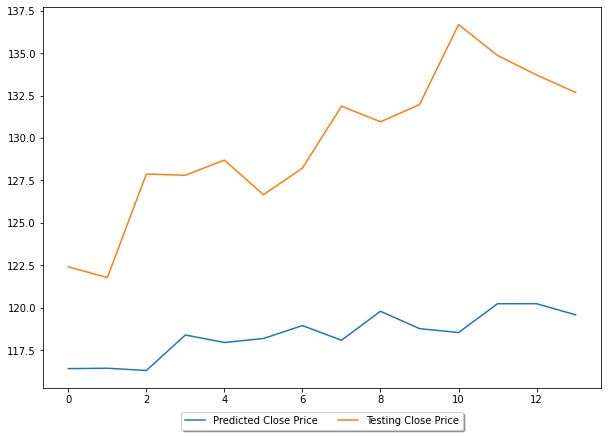

In [ ]:
 
# plotting
plt.figure(figsize=(10,7))
 
# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()